In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)

## Problem 1
$$f(x) = x^2 - x - 1$$
$$g(x) = \sqrt{x+1}, x \in [0, \infty)$$

In [38]:
def f(x):
    return x ** 2 - x - 1

def g(x):
    return np.sqrt(x + 1)

Sketch $g(x)$ and $y=x$.

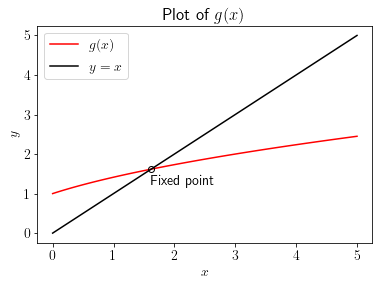

In [39]:
x = np.linspace(0, 5, 100)
gx = g(x)
xi = (1 + np.sqrt(5)) / 2

plt.plot(x, gx, 'r-', label='$g(x)$')
plt.plot(x, x, 'k-', label='$y=x$')
plt.plot(xi, g(xi), 'o', markerfacecolor='none', markeredgecolor='k')
plt.annotate('Fixed point', xy=(xi, g(xi)), xytext=(xi, g(xi) - 0.4))

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plot of $g(x)$')
plt.legend()

# plt.savefig('fig1.pdf', dpi=100)

## Problem 2
$$f(x) = x^4 + 2x^3 - 3x^2 - 4x - 2$$

In [40]:
def f(x):
    return x ** 4 + 2 * (x ** 3) - 3 * x * x - 4 * x - 2

def g(x):
    return (3 * (x ** 4) + 4 * (x ** 3) - 3 * x * x + 2) / (4 * (x ** 3) + 6 * x * x - 6 * x - 4)

### Newton's method

In [41]:
x0 = 1.1
tol = 1e-16
err = 1.0

i = 1
x = [x0]
errs = [err]
print('{:^5}   {:^18s}   {:^18s}'.format("i", "x_i", "err"))
while err >= tol:
    x1 = g(x0)
    err = np.abs(x1 - x0)
    print('{:5}   {:.16f}   {:.16f}'.format(i, x1, err))
    x.append(x1)
    errs.append(err)
    x0 = x1
    i += 1

print(f"Ended at iteration {i}, x_i={x0}")
# errs

  i            x_i                  err        
    1   4.0757560483870927   2.9757560483870926
    2   3.0722894227672528   1.0034666256198399
    3   2.3766266659744915   0.6956627567927613
    4   1.9395585483111686   0.4370681176633229
    5   1.7263583208556350   0.2132002274555336
    6   1.6713439893671829   0.0550143314884521
    7   1.6678443526156230   0.0034996367515598
    8   1.6678306538313603   0.0000136987842627
    9   1.6678306536219978   0.0000000002093625
   10   1.6678306536219978   0.0000000000000000
Ended at iteration 11, x_i=1.6678306536219978


### Secant method

In [42]:
x0 = 1.1
x1 = 2
tol = 1e-16
err = x1 - x0

i = 2
x = [x0, x1]
errs = [err]
print('{:^5}   {:^18s}   {:^18s}'.format("i", "x_i", "err"))
while err >= tol:
    x2 = x1 - f(x1) / ((f(x1) - f(x0)) / (x1 - x0))
    err = np.abs(x2 - x1)
    print('{:5}   {:.16f}   {:.16f}'.format(i, x2, err))
#     print('$x_{:d}$ & {:.16f} \\\\ \\hline'.format(i, x2))
    x.append(x2)
    errs.append(err)
    x0 = x1
    x1 = x2
    i += 1

print(f"Ended at iteration {i}, x_i={x0}")    
    

  i            x_i                  err        
    2   1.4341010695489786   0.5658989304510214
    3   1.5892637978132622   0.1551627282642836
    4   1.6944986616801658   0.1052348638669036
    5   1.6654010540816935   0.0290976075984724
    6   1.6677596627813140   0.0023586086996206
    7   1.6678308464113449   0.0000711836300309
    8   1.6678306536067278   0.0000001928046172
    9   1.6678306536219978   0.0000000000152700
   10   1.6678306536219978   0.0000000000000000
Ended at iteration 11, x_i=1.6678306536219978


### Bisection Method

In [43]:
a0 = 1.1
b0 = 2
tol = 1e-16

a = [a0]
b = [b0]
c = [(a0 + b0) / 2]
i = 0
err = 1

print('{:^5}   {:^18s}'.format("i", "c_i"))

while err > tol:
    if f(a[i]) * f(c[i]) < 0:
        a.append(a[i])
        b.append(c[i])
        c.append((a[i] + c[i]) / 2)
    elif f(b[i]) * f(c[i]) < 0:
        a.append(c[i])
        b.append(b[i])
        c.append((c[i] + b[i]) / 2)
    else:
        break
    print('{:5}   {:.16f}'.format(i, c[i]))
    err = np.abs(c[i + 1] - c[i])
    i += 1
        

  i            c_i        
    0   1.5500000000000000
    1   1.7749999999999999
    2   1.6625000000000001
    3   1.7187500000000000
    4   1.6906250000000000
    5   1.6765625000000002
    6   1.6695312500000001
    7   1.6660156250000000
    8   1.6677734375000002
    9   1.6686523437500003
   10   1.6682128906250002
   11   1.6679931640625001
   12   1.6678833007812501
   13   1.6678283691406253
   14   1.6678558349609376
   15   1.6678421020507814
   16   1.6678352355957033
   17   1.6678318023681644
   18   1.6678300857543948
   19   1.6678309440612797
   20   1.6678305149078372
   21   1.6678307294845585
   22   1.6678306221961978
   23   1.6678306758403783
   24   1.6678306490182879
   25   1.6678306624293331
   26   1.6678306557238105
   27   1.6678306523710491
   28   1.6678306540474299
   29   1.6678306532092395
   30   1.6678306536283347
   31   1.6678306534187870
   32   1.6678306535235610
   33   1.6678306535759480
   34   1.6678306536021412
   35   1.6678306536152379
 

## Problem 3
$$g(x) = \frac{1}{2} \tan x$$
$$h(x) = \arctan (2x)$$

In [44]:
def g(x):
    return 0.5 * np.tan(x)

def h(x):
    return np.arctan(2 * x)

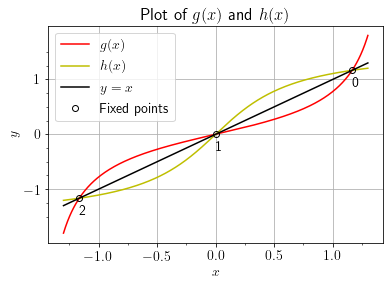

In [45]:
x = np.linspace(-1.3, 1.3, 300)
gx = g(x)
hx = h(x)
xi = np.array([1.16556118, 0, -1.16556118])

fig, ax = plt.subplots()

ax.plot(x, gx, 'r', label='$g(x)$')
ax.plot(x, hx, 'y', label='$h(x)$')
ax.plot(x, x, 'k', label='$y=x$')
ax.plot(xi, h(xi), 'o', markerfacecolor='none', markeredgecolor='k', label='Fixed points')
for i in range(3):
    plt.annotate(str(i), xy=(xi[i], h(xi[i])), xytext=(xi[i], h(xi[i]) - 0.3))

# plt.xlim((1, 1.4))
# plt.ylim((0.5, 3.5))

spacing = 0.25
minorLocator = MultipleLocator(spacing)
ax.yaxis.set_minor_locator(minorLocator)
ax.xaxis.set_minor_locator(minorLocator)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plot of $g(x)$ and $h(x)$')
plt.legend()
plt.grid()


# plt.savefig('fig2.pdf', dpi=100)

## Problem 4(c)

$$g(x) = 0.5x - (0.5x - \tan x)^2$$

In [46]:
def g(x):
    return 0.5 * x - (0.5 * x - np.tan(x)) ** 2

In [47]:
x0 = -0.5
tol = 1e-16
err = 1.0

i = 0
x = [x0]
errs = [err]
print('{:^5}   {:^18s}   {:^18s}'.format("i", "x_i", "err"))
while i < 100:
    i += 1
    x1 = g(x0)
    err = np.abs(x1 - x0)
    print('{:5}   {:.16f}   {:.16f}'.format(i, x1, err))
    x.append(x1)
    errs.append(err)
    x0 = x1
    
print(f"order of convergence: {(np.log(x[i] / x[i - 1]) / np.log(x[i - 1] / x[i - 2]))}")

  i            x_i                  err        
    1   -0.3377951654876296   0.1622048345123704
    2   -0.2021529345587224   0.1356422309289072
    3   -0.1118666806588958   0.0902862538998266
    4   -0.0591145628231221   0.0527521178357737
    5   -0.0304349953324100   0.0286795674907121
    6   -0.0154493560995414   0.0149856392328686
    7   -0.0077843676938627   0.0076649884056786
    8   -0.0039073341660579   0.0038770335278049
    9   -0.0019574839757975   0.0019498501902603
   10   -0.0009796999286717   0.0009777840471258
   11   -0.0004900899176305   0.0004896100110412
   12   -0.0002451050058663   0.0002449849117642
   13   -0.0001225675220503   0.0001225374838160
   14   -0.0000612875167246   0.0000612800053257
   15   -0.0000306446974022   0.0000306428193224
   16   -0.0000153225834755   0.0000153221139267
   17   -0.0000076613504331   0.0000076612330424
   18   -0.0000038306898906   0.0000038306605425
   19   -0.0000019153486139   0.0000019153412768
   20   -0.0000009576